# Import Package

In [ ]:
#Import Package

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from pandas_datareader import data as pdr
import yfinance as yfin

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense
from keras.layers import Dropout
from keras import optimizers

# Import Data




In [ ]:
df = pd.read_csv('/content/BBCA.JK(real).csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,5200.0,5200.0,5200.0,5200.0,4629.853516,0
2019-01-02,5200.0,5245.0,5200.0,5240.0,4665.467773,35956000
2019-01-03,5200.0,5220.0,5115.0,5180.0,4612.046387,72358000
2019-01-04,5175.0,5205.0,5125.0,5205.0,4634.306641,51465000
2019-01-07,5265.0,5325.0,5245.0,5245.0,4669.919922,73438000
...,...,...,...,...,...,...
2024-01-26,9400.0,9450.0,9300.0,9350.0,9139.393555,78977300
2024-01-29,9400.0,9550.0,9375.0,9550.0,9334.888672,73452800
2024-01-30,9500.0,9650.0,9475.0,9650.0,9432.635742,73136400


# Exploratory Data Analysis



> Describing the Head



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1255 non-null   object 
 1   Open       1255 non-null   float64
 2   High       1255 non-null   float64
 3   Low        1255 non-null   float64
 4   Close      1255 non-null   float64
 5   Adj Close  1255 non-null   float64
 6   Volume     1255 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.8+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,7134.159363,7196.561753,7069.430279,7132.908367,6672.570682,8.337875e+07
std,1288.271714,1292.025532,1290.952913,1293.099843,1391.115036,5.401298e+07
min,4450.000000,4800.000000,4325.000000,4430.000000,3992.931396,0.000000e+00
25%,6070.000000,6110.000000,6010.000000,6062.500000,5553.224853,5.358565e+07
50%,6815.000000,6880.000000,6735.000000,6790.000000,6184.970703,7.198820e+07
75%,8362.500000,8475.000000,8312.500000,8375.000000,7956.755371,9.833840e+07
max,9775.000000,9775.000000,9675.000000,9750.000000,9530.383789,7.228279e+08




> Checking Null Data or Missing Values



In [ ]:
missing_values=pd.isnull(df['Close']).sum()
print("Jumlah Data Null: ", missing_values)

Jumlah Data Null:  0




> Finding the trend or pattern



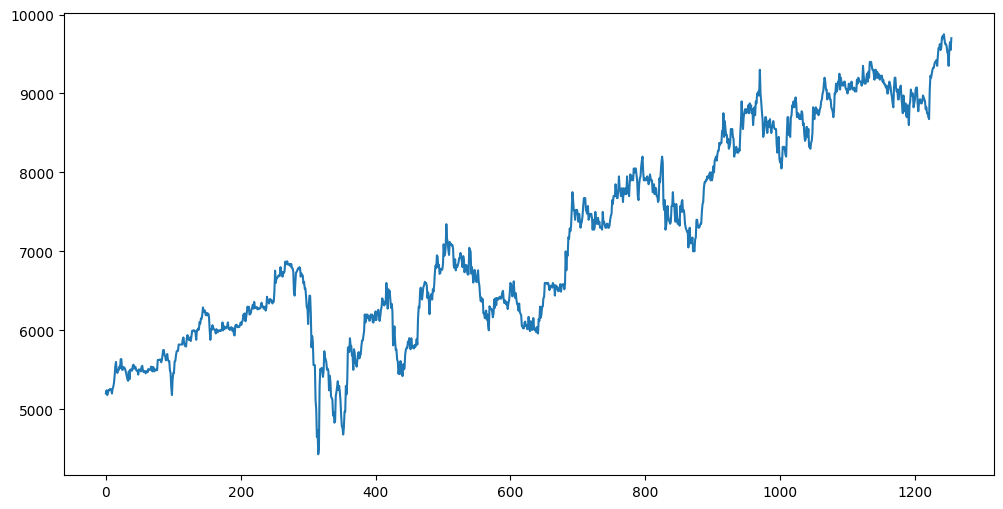

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])

In [ ]:
## Taking year from index
df.index = pd.to_datetime(df.index)
df['Year'] = df.index.year
df

,Open,High,Low,Close,Adj Close,Volume,Year
Date,,,,,,,
2019-01-01,5200.0,5200.0,5200.0,5200.0,4629.853516,0,2019
2019-01-02,5200.0,5245.0,5200.0,5240.0,4665.467773,35956000,2019
2019-01-03,5200.0,5220.0,5115.0,5180.0,4612.046387,72358000,2019
2019-01-04,5175.0,5205.0,5125.0,5205.0,4634.306641,51465000,2019
2019-01-07,5265.0,5325.0,5245.0,5245.0,4669.919922,73438000,2019
...,...,...,...,...,...,...,...
2024-01-26,9400.0,9450.0,9300.0,9350.0,9139.393555,78977300,2024
2024-01-29,9400.0,9550.0,9375.0,9550.0,9334.888672,73452800,2024
2024-01-30,9500.0,9650.0,9475.0,9650.0,9432.635742,73136400,2024


# Pre-Processing Dataset



> Pick only The Close Column



In [ ]:
df_close=df[['Close']]
df_close

,Close
Date,
2019-01-01,5200.0
2019-01-02,5240.0
2019-01-03,5180.0
2019-01-04,5205.0
2019-01-07,5245.0
...,...
2024-01-26,9350.0
2024-01-29,9550.0
2024-01-30,9650.0


In [ ]:
df_close.shape

(1255, 1)

In [ ]:
df_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2019-01-01 to 2024-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1255 non-null   float64
dtypes: float64(1)
memory usage: 19.6 KB




> Applying Standard Scaler



In [ ]:
scaler=StandardScaler()
df_close['Close']=scaler.fit_transform(df_close[['Close']])
df_close

<ipython-input-258-07c0548f78fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['Close']=scaler.fit_transform(df_close[['Close']])


,Close
Date,
2019-01-01,-1.495383
2019-01-02,-1.464437
2019-01-03,-1.510855
2019-01-04,-1.491514
2019-01-07,-1.460569
...,...
2024-01-26,1.715239
2024-01-29,1.869968
2024-01-30,1.947332


In [ ]:
df_close.describe()

,Close
count,1.255000e+03
mean,-2.717614e-16
std,1.000399e+00
min,-2.091088e+00
25%,-8.281148e-01
50%,-2.652889e-01
75%,9.609365e-01
max,2.024697e+00




> Analisis AutoKorelasi



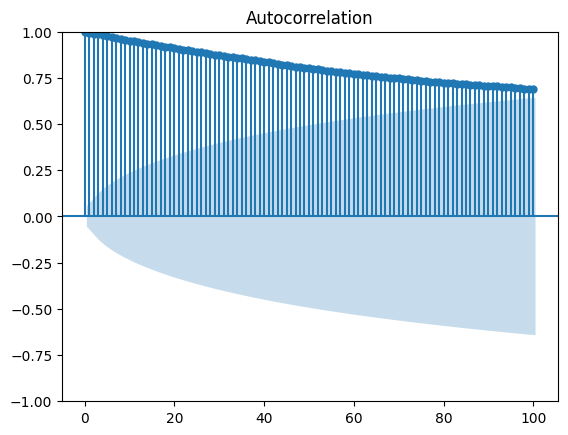

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_close['Close'],lags=100)
plt.show()



> Applying Lag to the Dataset



In [ ]:
# Menentukan jumlah lag yang diinginkan
num_lags = 2

# Membuat kolom-kolom yang merupakan lag dari kolom 'close'
for i in range(1, num_lags + 1):
    df_close[f'lag_{i}'] = df_close['Close'].shift(i)
df_close

<ipython-input-261-cf65664d0008>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close[f'lag_{i}'] = df_close['Close'].shift(i)
<ipython-input-261-cf65664d0008>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close[f'lag_{i}'] = df_close['Close'].shift(i)


,Close,lag_1,lag_2
Date,,,
2019-01-01,-1.495383,NaN,NaN
2019-01-02,-1.464437,-1.495383,NaN
2019-01-03,-1.510855,-1.464437,-1.495383
2019-01-04,-1.491514,-1.510855,-1.464437
2019-01-07,-1.460569,-1.491514,-1.510855
...,...,...,...
2024-01-26,1.715239,1.831286,1.850627
2024-01-29,1.869968,1.715239,1.831286
2024-01-30,1.947332,1.869968,1.715239


In [ ]:
df_close=df_close.dropna()
df_close

,Close,lag_1,lag_2
Date,,,
2019-01-03,-1.510855,-1.464437,-1.495383
2019-01-04,-1.491514,-1.510855,-1.464437
2019-01-07,-1.460569,-1.491514,-1.510855
2019-01-08,-1.464437,-1.460569,-1.491514
2019-01-09,-1.452832,-1.464437,-1.460569
...,...,...,...
2024-01-26,1.715239,1.831286,1.850627
2024-01-29,1.869968,1.715239,1.831286
2024-01-30,1.947332,1.869968,1.715239




> Split Dataset



In [ ]:
data_train = df_close[:int(0.85*len(df_close))]
data_valid = df_close[int(0.85*len(df_close)):]

print("Data train shape :", data_train.shape)
print("Data valid shape  :", data_valid.shape)

Data train shape : (1065, 3)
Data valid shape  : (188, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

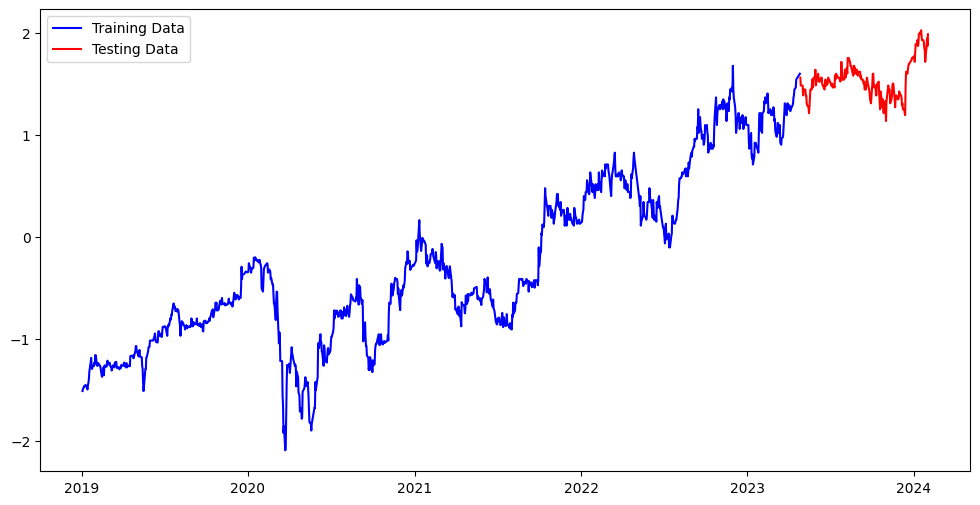

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data_train['Close'],label='Training Data',color='blue')
plt.plot(data_valid['Close'],label='Testing Data',color='red')
plt.legend()
plt.show



> Splitting Data Training and Valid (X and Y)



In [ ]:
x_train = data_train.iloc[:, 1:]
y_train = data_train.iloc[:,0]

x_valid = data_valid.iloc[:, 1:]
y_valid = data_valid.iloc[:,0]

In [ ]:
x_train

,lag_1,lag_2
Date,,
2019-01-03,-1.464437,-1.495383
2019-01-04,-1.510855,-1.464437
2019-01-07,-1.491514,-1.510855
2019-01-08,-1.460569,-1.491514
2019-01-09,-1.464437,-1.460569
...,...,...
2023-04-13,1.367099,1.309076
2023-04-14,1.386441,1.367099
2023-04-17,1.444464,1.386441


# Define Function

In [ ]:
##Plot Training Prediksi
def plot_prediction_train(y_true, y_pred):
    """
    Plot hasil prediksi dan nilai sebenarnya.

    Parameters:
    - y_true (pandas.Series): Seri nilai sebenarnya.
    - y_pred (pandas.Series): Seri hasil prediksi.
    - dataset_name (str): Nama dataset (contoh: 'Validasi' atau 'Test').

    Returns:
    - None
    """
    plt.figure(figsize=(12, 6))

    # Plot nilai sebenarnya
    plt.plot(y_true.index,y_true, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

    # Plot hasil prediksi
    plt.plot(y_true.index,y_pred, label=f'Hasil Prediksi ', color='red')

    # Menambahkan judul dan label
    plt.title(f'Prediksi (Data Training)', fontsize=14)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Nilai', fontsize=12)

    # Menambahkan legenda
    plt.legend(fontsize=12)

    # Menampilkan plot
    plt.show()

In [ ]:
##Plot Testing
def plot_prediction_test(y_true, y_pred):
    """
    Plot hasil prediksi dan nilai sebenarnya.

    Parameters:
    - y_true (pandas.Series): Seri nilai sebenarnya.
    - y_pred (pandas.Series): Seri hasil prediksi.
    - dataset_name (str): Nama dataset (contoh: 'Validasi' atau 'Test').

    Returns:
    - None
    """
    plt.figure(figsize=(12, 6))

    # Plot nilai sebenarnya
    plt.plot(y_true.index,y_true, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

    # Plot hasil prediksi
    plt.plot(y_true.index,y_pred, label=f'Hasil Prediksi ', color='red')

    # Menambahkan judul dan label
    plt.title(f'Prediksi (Data Testing)', fontsize=14)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Nilai', fontsize=12)

    # Menambahkan legenda
    plt.legend(fontsize=12)

    # Menampilkan plot
    plt.show()

In [ ]:
## MAE
def calculate_mape(Y_test, y_pred_test):
  for i in range (len(Y_test)):
    mape =np.abs((Y_test[i] - y_pred_test[i]) / Y_test[i])
  mape=mape/(len(Y_test))*100
  return mape

def calculate_mae(Y_test, y_pred):
  for i in range (len(Y_test)):
    mae = np.abs((Y_test[i] - y_pred[i]) / Y_test[i])
  mae=mae/len(Y_test)
  return mae

def calculate_mse(Y_test, y_pred):
  for i in range (len(Y_test)):
    mse = ((Y_test[i] - y_pred[i]) * (Y_test[i]-y_pred[i]))
  mse=mse/len(Y_test)
  return mse

In [ ]:
def train_gwo(x_train,y_train,n,lr):
  from keras.optimizers import Adam
  model = Sequential()
  model.add(LSTM(n, input_shape=(x_train.shape[1],1), return_sequences=False))
  model.add(Dense(1))

  optimizer = Adam(learning_rate=lr)
  model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

  history = model.fit(x_train, y_train, validation_split=0.15,epochs=50)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

  # Loss
  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.legend(['Training Loss','Validation Loss'])
  ax1.set_xlabel('Epoch', fontsize=12)
  ax1.set_ylabel('Loss', fontsize=12)
  ax1.set_title('Loss', fontsize=20)

  # MSE
  ax2.plot(history.history['mse'])
  ax2.plot(history.history['val_mse'])
  ax2.legend(['Training MSE','Val MSE'])
  ax2.set_xlabel('Epoch', fontsize=12)
  ax2.set_ylabel('Mean Squared Error', fontsize=12)
  ax2.set_title('Mean Squared Error', fontsize=20)
  plt.show()

  return model

In [ ]:
def test_gwo (model,x_train,x_valid):
  pred_train_lstmgwo=model.predict(x_train)
  pred_test_lstmgwo=model.predict(x_valid)

  return pred_train_lstmgwo, pred_test_lstmgwo

# Training Model

# Model LSTM (tanpa GWO)



1.   Training



In [ ]:
from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(4, input_shape=(x_train.shape[1],1), return_sequences=False))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.00049)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(x_train, y_train, validation_split=0.15,epochs=50)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 1.1378 - val_mse: 1.1378
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5683 - mse: 0.5683 - val_loss: 1.1554 - val_mse: 1.1554
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5351 - mse: 0.5351 - val_loss: 1.1708 - val_mse: 1.1708
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4788 - mse: 0.4788 - val_loss: 1.1838 - val_mse: 1.1838
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4536 - mse: 0.4536 - val_loss: 1.1934 - val_mse: 1.1934
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3848 - mse: 0.3848 - val_loss: 1.1998 - val_mse: 1.1998
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3507 - mse: 0.3507 - val_loss: 1.2024 - val_mse: 1.2024
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3201 - mse: 0.3201 - val_loss: 1.1993 - val_mse: 1.1993
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2796 - mse:

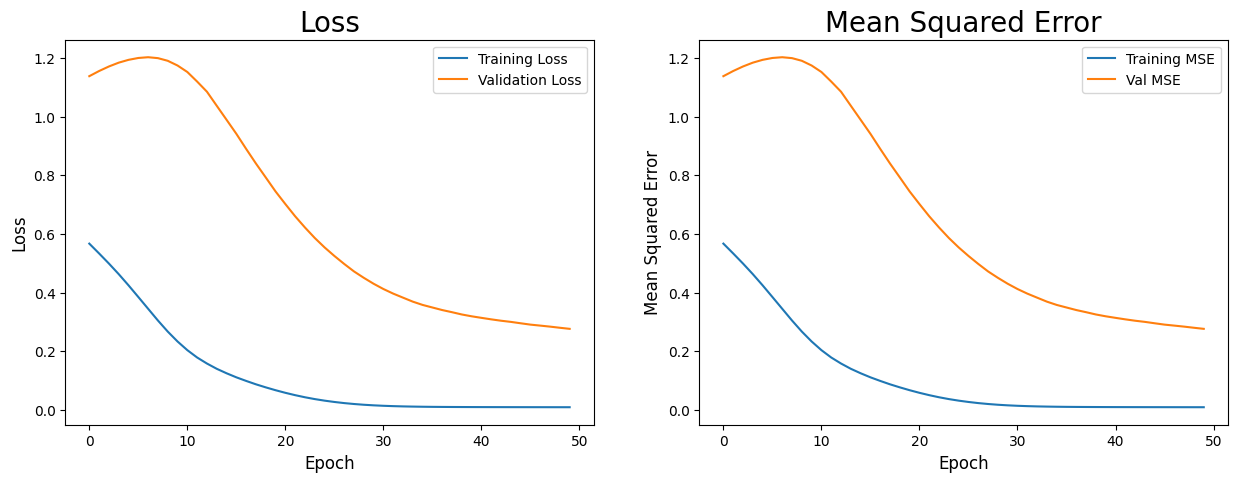

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['Training Loss','Validation Loss'])
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Loss', fontsize=20)

# MSE
ax2.plot(history.history['mse'])
ax2.plot(history.history['val_mse'])
ax2.legend(['Training MSE','Val MSE'])
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Mean Squared Error', fontsize=12)
ax2.set_title('Mean Squared Error', fontsize=20)
plt.show()

In [ ]:
pred_train_biasa=model.predict(x_train)
pred_train_biasa

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


array([[-1.4193645 ],
       [-1.4338117 ],
       [-1.4339621 ],
       ...,
       [ 0.67395806],
       [ 0.67660934],
       [ 0.6797775 ]], dtype=float32)

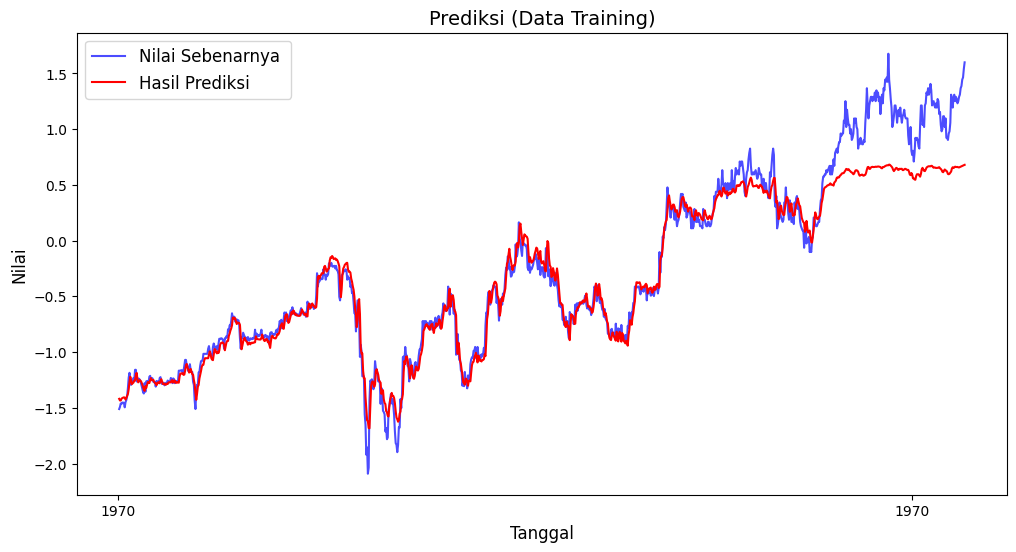

In [ ]:
plot_prediction_train(y_train,pred_train_biasa)

**Testing**

In [ ]:
pred_test_biasa=model.predict(x_valid)
pred_test_biasa

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.68301034],
       [0.68273497],
       [0.6798343 ],
       [0.6783392 ],
       [0.67446357],
       [0.67395806],
       [0.67586195],
       [0.67586195],
       [0.67340285],
       [0.6714553 ],
       [0.66757625],
       [0.66308945],
       [0.66095585],
       [0.65616494],
       [0.65644866],
       [0.66881067],
       [0.67586195],
       [0.6792565 ],
       [0.6788326 ],
       [0.67785364],
       [0.68082553],
       [0.6822699 ],
       [0.6842144 ],
       [0.6806451 ],
       [0.68187815],
       [0.68273497],
       [0.6811158 ],
       [0.6810681 ],
       [0.6808143 ],
       [0.6816351 ],
       [0.6822699 ],
       [0.6804913 ],
       [0.6787794 ],
       [0.6783392 ],
       [0.6768953 ],
       [0.6773218 ],
       [0.6802525 ],
       [0.6795264 ],
       [0.6783392 ],
       [0.67901   ],
       [0.68125254],
       [0.68049127],
       [0.6787794 ],
       [0.6783392 ],
       [0.67901   ],
       [0.6780784 ],
       [0.67785364],
       [0.677

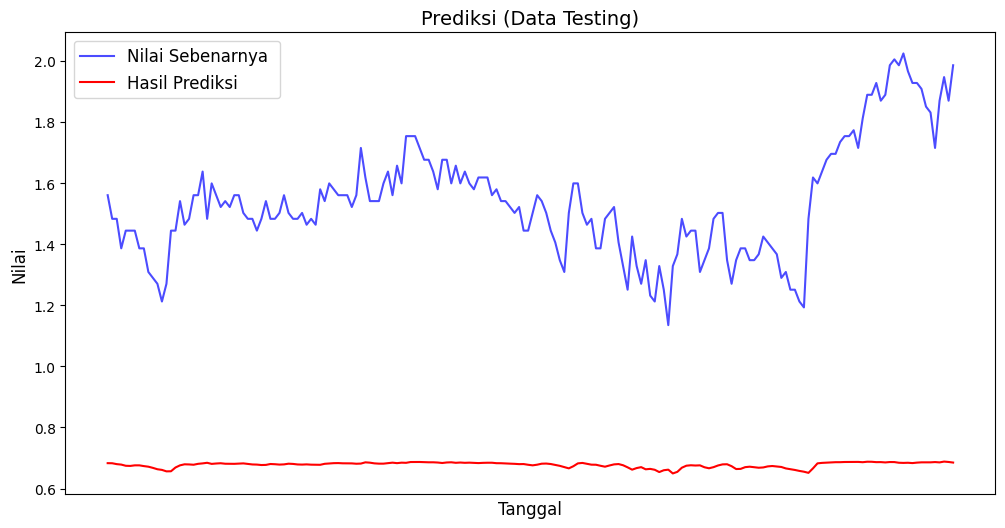

In [ ]:
# Panggil fungsi plot_prediction untuk set test
plot_prediction_test(y_valid, pred_test_biasa)

In [ ]:
pred_test_lstmgwo=[]
pred_train_lstmgwo=[]

# Model Terbaik LSTM-GWO (1)

Training

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.4384 - mse: 0.4384 - val_loss: 0.5780 - val_mse: 0.5780
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0486 - mse: 0.0486 - val_loss: 0.2071 - val_mse: 0.2071
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0512 - val_mse: 0.0512
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0057 - mse: 0.

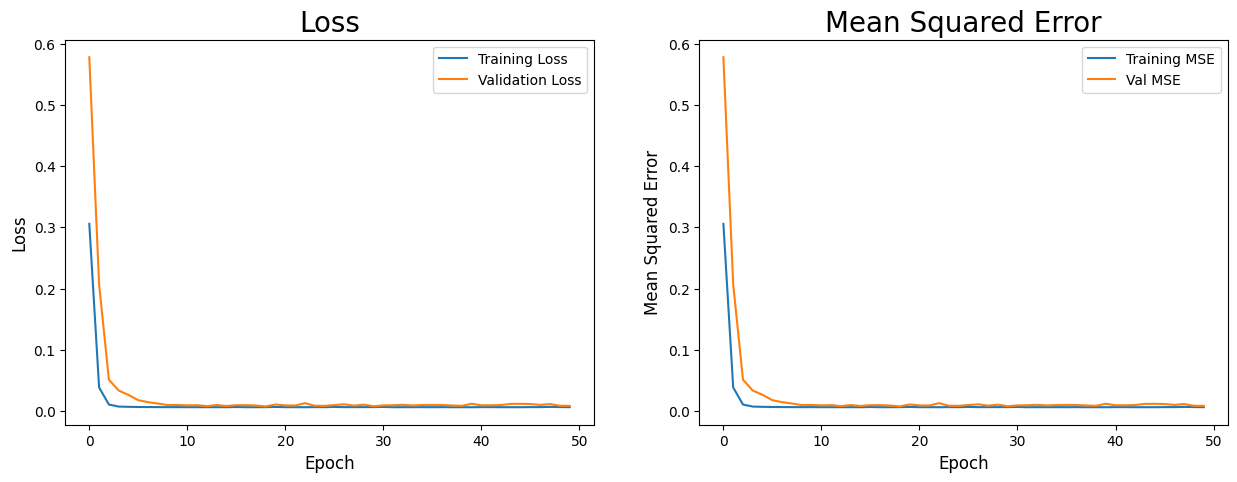

In [ ]:
lstmgwo_1=train_gwo(x_train,y_train,n=256,lr=0.00087)

Testing

In [ ]:
pred_train_lstmgwo_1, pred_test_lstmgwo_1=test_gwo(lstmgwo_1,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_1)
pred_train_lstmgwo.append(pred_train_lstmgwo_1)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


# Model LSTM GWO Terbaik (2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.4387 - mse: 0.4387 - val_loss: 0.4615 - val_mse: 0.4615
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0424 - mse: 0.0424 - val_loss: 0.1333 - val_mse: 0.1333
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0064 - mse: 0.

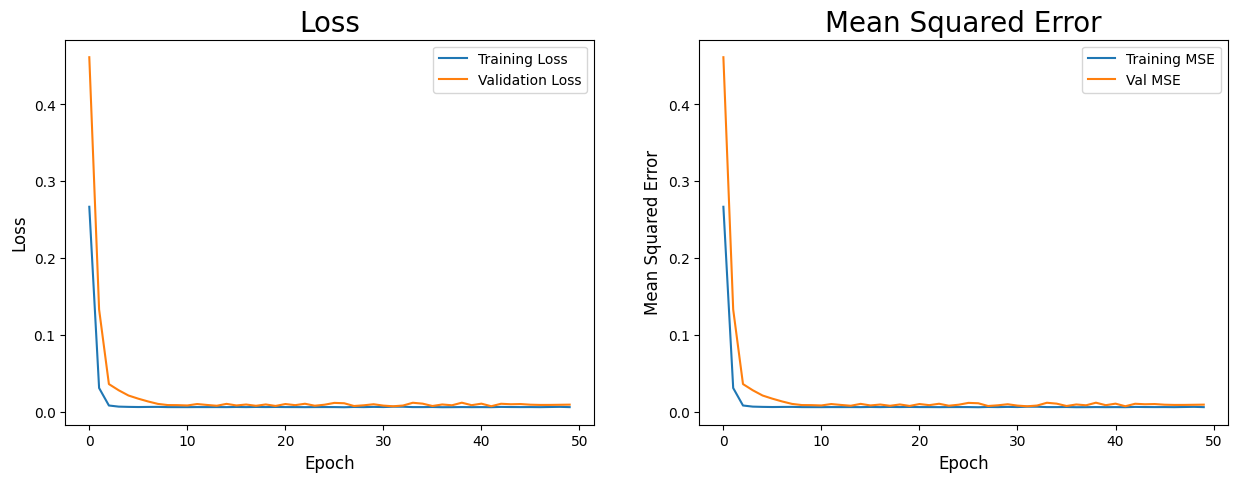

In [ ]:
lstmgwo_2=train_gwo(x_train,y_train,n=256,lr=0.001)

In [ ]:
pred_train_lstmgwo_2, pred_test_lstmgwo_2=test_gwo(lstmgwo_2,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_2)
pred_train_lstmgwo.append(pred_train_lstmgwo_2)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM GWO Terbaik (3)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.4027 - mse: 0.4027 - val_loss: 0.4469 - val_mse: 0.4469
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0447 - mse: 0.0447 - val_loss: 0.1376 - val_mse: 0.1376
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0066 - mse: 0.

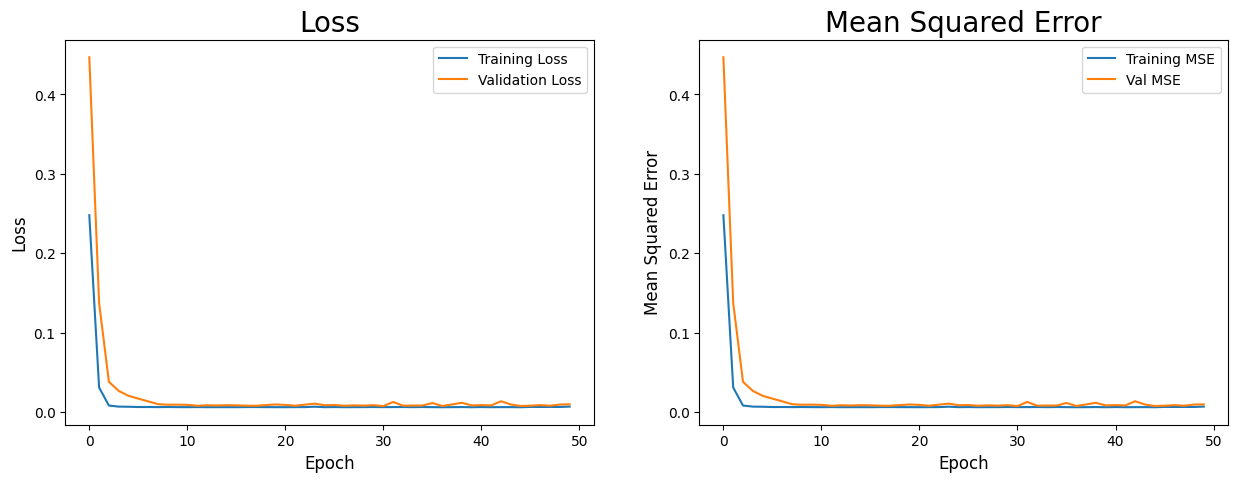

In [ ]:
lstmgwo_3=train_gwo(x_train,y_train,n=256,lr=0.00093)

In [ ]:
pred_train_lstmgwo_3, pred_test_lstmgwo_3=test_gwo(lstmgwo_3,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_3)
pred_train_lstmgwo.append(pred_train_lstmgwo_3)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (4)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.4097 - mse: 0.4097 - val_loss: 0.5160 - val_mse: 0.5160
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.1704 - val_mse: 0.1704
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0498 - val_mse: 0.0498
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0058 - mse: 0.

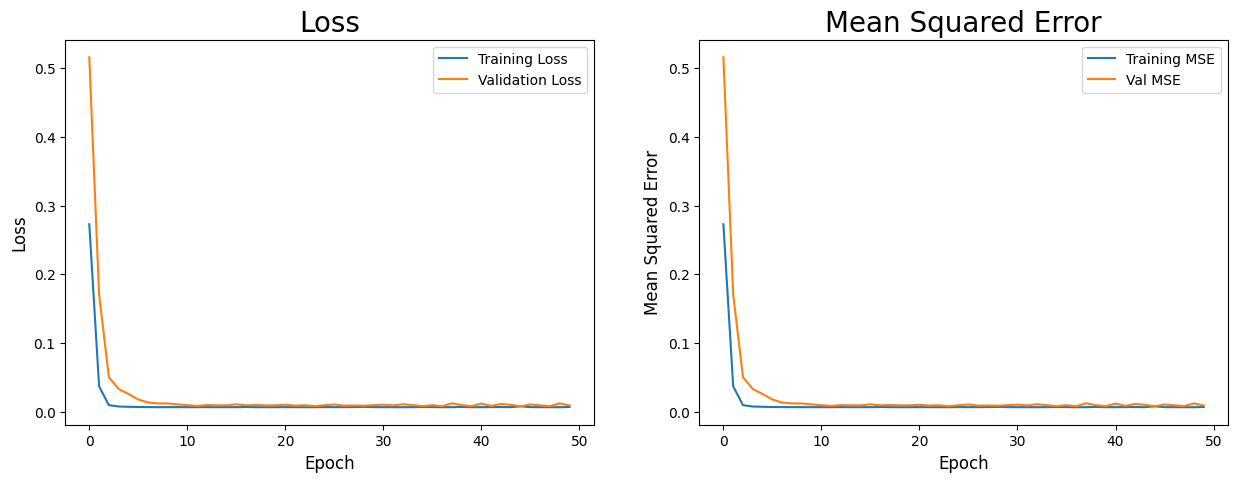

In [ ]:
lstmgwo_4=train_gwo(x_train,y_train,n=252,lr=0.00088)

In [ ]:
pred_train_lstmgwo_4, pred_test_lstmgwo_4=test_gwo(lstmgwo_4,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_4)
pred_train_lstmgwo.append(pred_train_lstmgwo_4)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (5)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4632 - mse: 0.4632 - val_loss: 0.5668 - val_mse: 0.5668
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0465 - mse: 0.0465 - val_loss: 0.2132 - val_mse: 0.2132
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0579 - val_mse: 0.0579
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0057 - mse: 0.

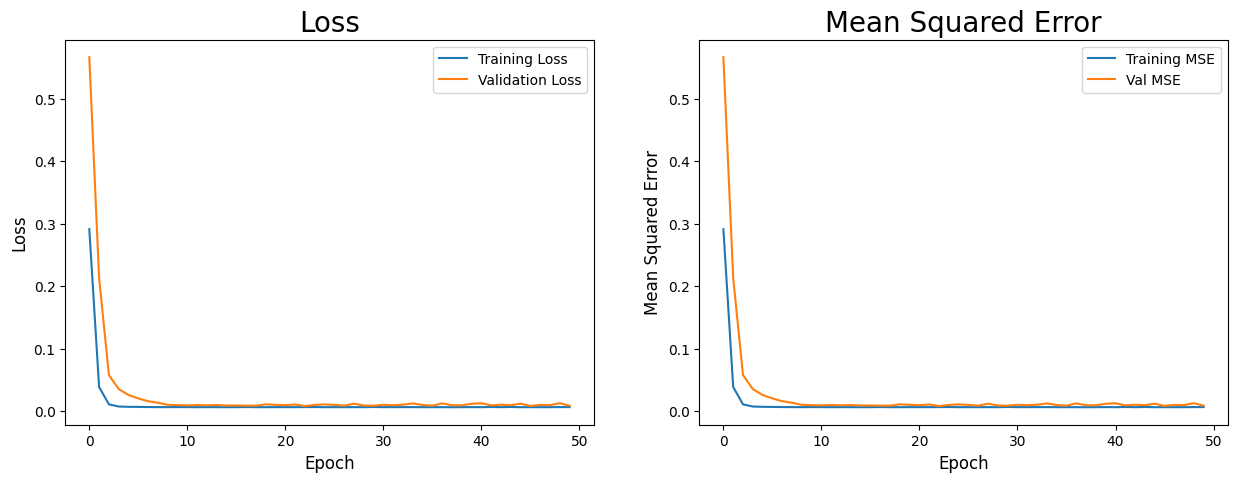

In [ ]:
lstmgwo_5=train_gwo(x_train,y_train,n=250,lr=0.0009)

In [ ]:
pred_train_lstmgwo_5, pred_test_lstmgwo_5=test_gwo(lstmgwo_5,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_5)
pred_train_lstmgwo.append(pred_train_lstmgwo_5)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (6)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.4585 - mse: 0.4585 - val_loss: 0.6397 - val_mse: 0.6397
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0476 - mse: 0.0476 - val_loss: 0.2649 - val_mse: 0.2649
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0869 - val_mse: 0.0869
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0068 - mse: 0.

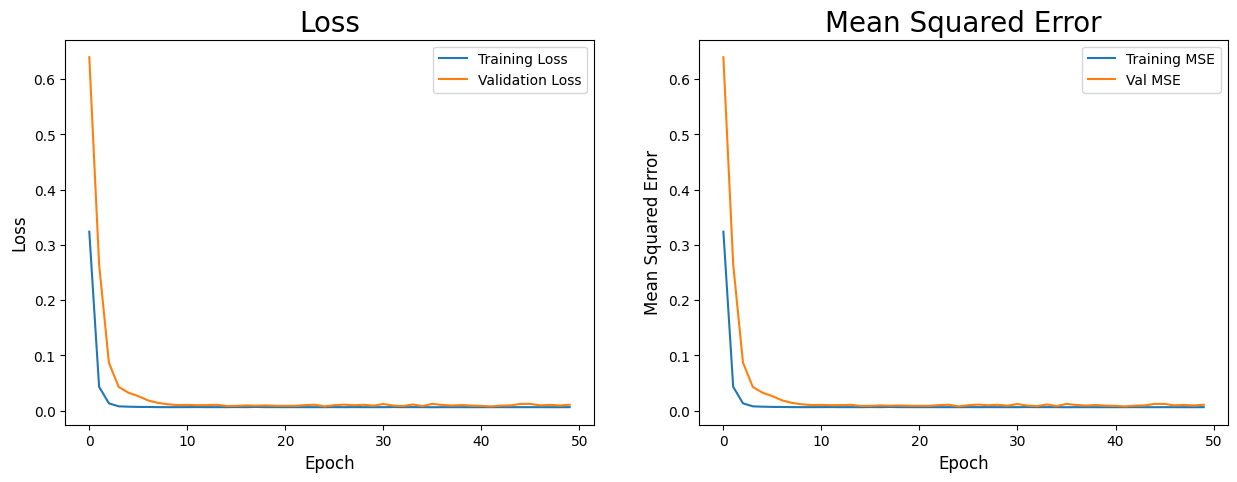

In [ ]:
lstmgwo_6=train_gwo(x_train,y_train,n=250,lr=0.00074)

In [ ]:
pred_train_lstmgwo_6, pred_test_lstmgwo_6=test_gwo(lstmgwo_6,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_6)
pred_train_lstmgwo.append(pred_train_lstmgwo_6)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (7)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.4864 - mse: 0.4864 - val_loss: 0.7786 - val_mse: 0.7786
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0835 - mse: 0.0835 - val_loss: 0.3984 - val_mse: 0.3984
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.1850 - val_mse: 0.1850
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0808 - val_mse: 0.0808
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0507 - val_mse: 0.0507
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mse: 0.005

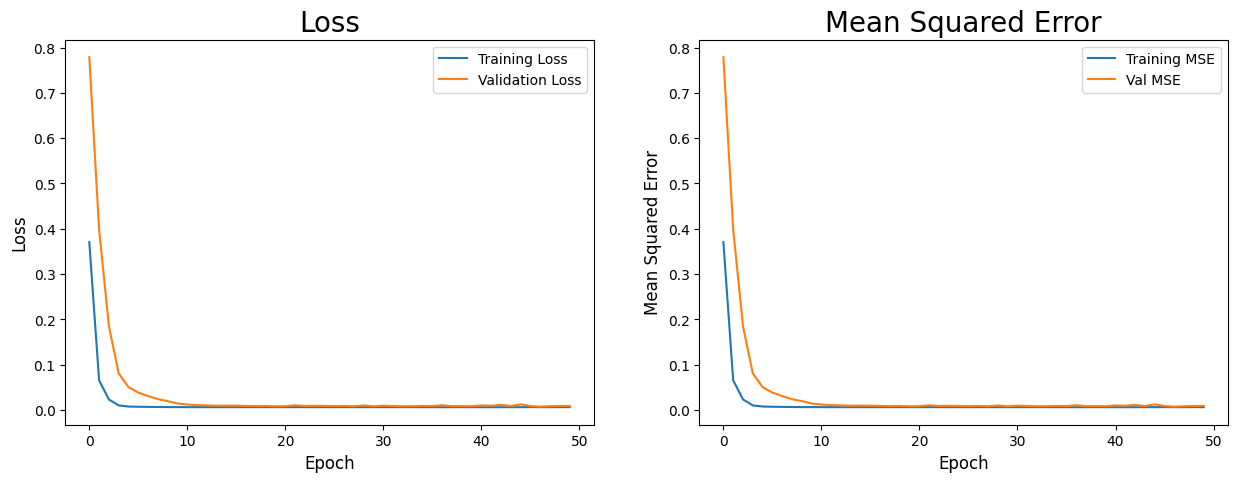

In [ ]:
lstmgwo_7=train_gwo(x_train,y_train,n=230,lr=0.00063)

In [ ]:
pred_train_lstmgwo_7, pred_test_lstmgwo_7=test_gwo(lstmgwo_7,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_7)
pred_train_lstmgwo.append(pred_train_lstmgwo_7)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (8)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.5244 - mse: 0.5244 - val_loss: 0.7420 - val_mse: 0.7420
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0799 - mse: 0.0799 - val_loss: 0.3361 - val_mse: 0.3361
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.1388 - val_mse: 0.1388
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0062 - mse: 0.

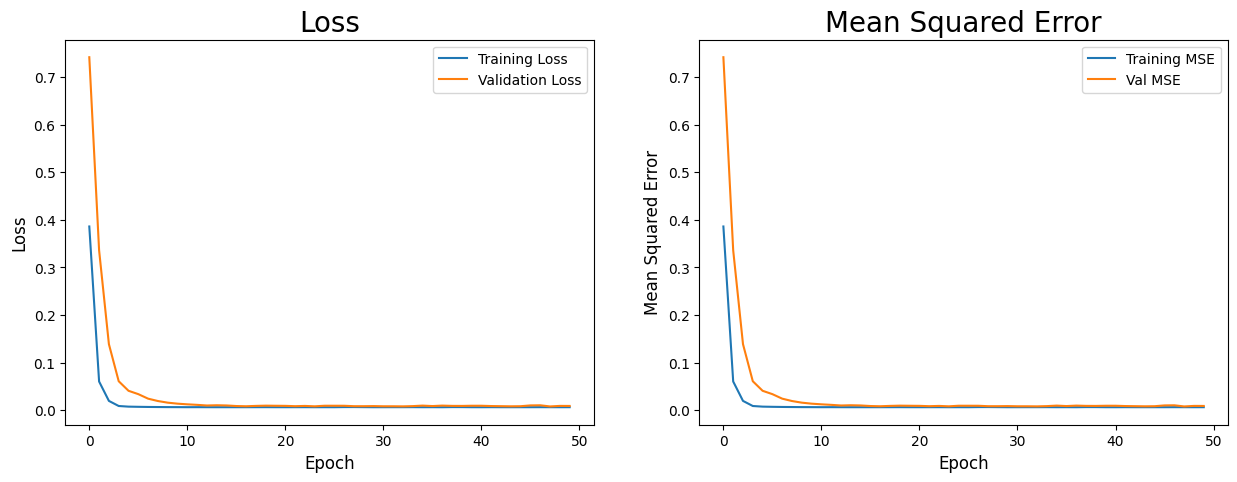

In [ ]:
lstmgwo_8=train_gwo(x_train,y_train,n=256,lr=0.00062)

In [ ]:
pred_train_lstmgwo_8, pred_test_lstmgwo_8=test_gwo(lstmgwo_8,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_8)
pred_train_lstmgwo.append(pred_train_lstmgwo_8)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (9)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.5918 - mse: 0.5918 - val_loss: 1.0199 - val_mse: 1.0199
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2806 - mse: 0.2806 - val_loss: 0.7495 - val_mse: 0.7495
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0873 - mse: 0.0873 - val_loss: 0.5253 - val_mse: 0.5253
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0493 - mse: 0.0493 - val_loss: 0.3581 - val_mse: 0.3581
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.2413 - val_mse: 0.2413
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.1591 - val_mse: 0.1591
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.1086 - val_mse: 0.1086
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0751 - val_mse: 0.0751
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0073 - mse: 0.

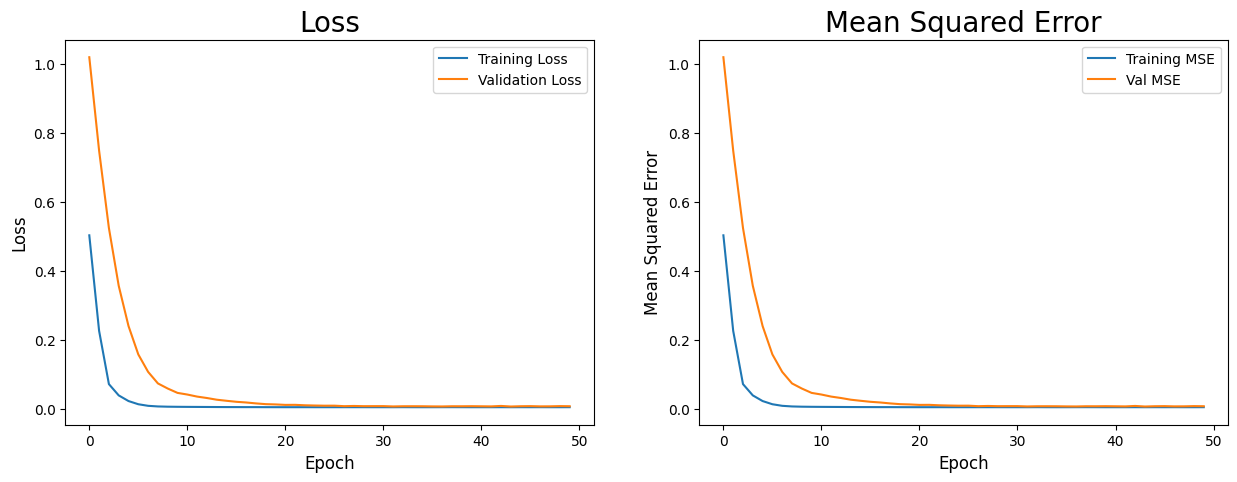

In [ ]:
lstmgwo_9=train_gwo(x_train,y_train,n=256,lr=0.00030)

In [ ]:
pred_train_lstmgwo_9, pred_test_lstmgwo_9=test_gwo(lstmgwo_9,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_9)
pred_train_lstmgwo.append(pred_train_lstmgwo_9)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (10)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.5043 - mse: 0.5043 - val_loss: 0.8209 - val_mse: 0.8209
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1719 - mse: 0.1719 - val_loss: 0.5172 - val_mse: 0.5172
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.3194 - val_mse: 0.3194
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.1896 - val_mse: 0.1896
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.1121 - val_mse: 0.1121
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0693 - val_mse: 0.0693
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0509 - val_mse: 0.0509
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0412 - val_mse: 0.0412
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0080 - mse: 0.

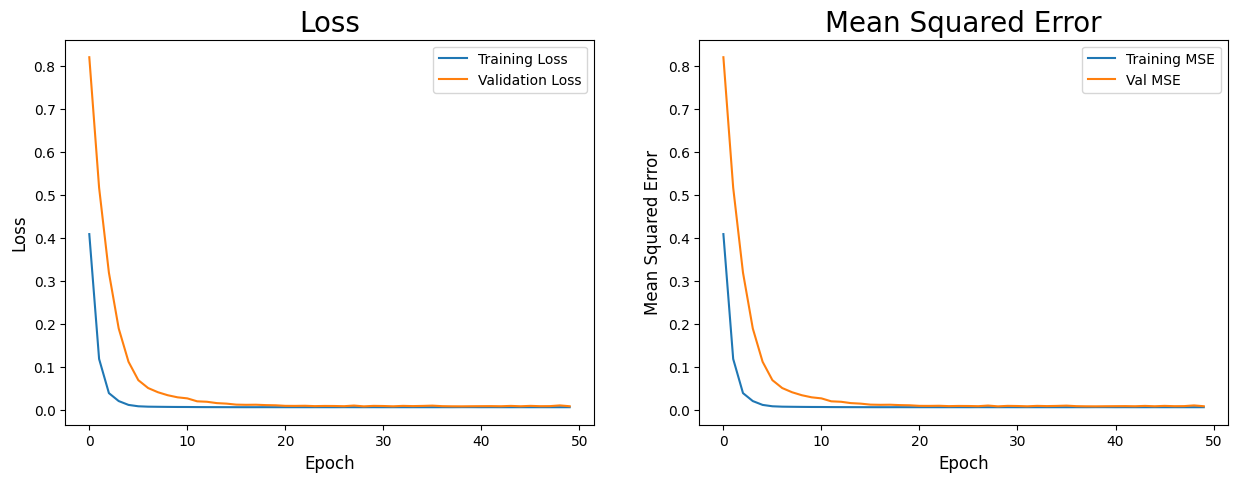

In [ ]:
lstmgwo_10=train_gwo(x_train,y_train,n=256,lr=0.00039)

In [ ]:
pred_train_lstmgwo_10, pred_test_lstmgwo_10=test_gwo(lstmgwo_10,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_10)
pred_train_lstmgwo.append(pred_train_lstmgwo_10)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


# Model LSTM-GWO Terbaik (11)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.5072 - mse: 0.5072 - val_loss: 0.6657 - val_mse: 0.6657
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.2769 - val_mse: 0.2769
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0885 - val_mse: 0.0885
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0403 - val_mse: 0.0403
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0065 - mse: 0.

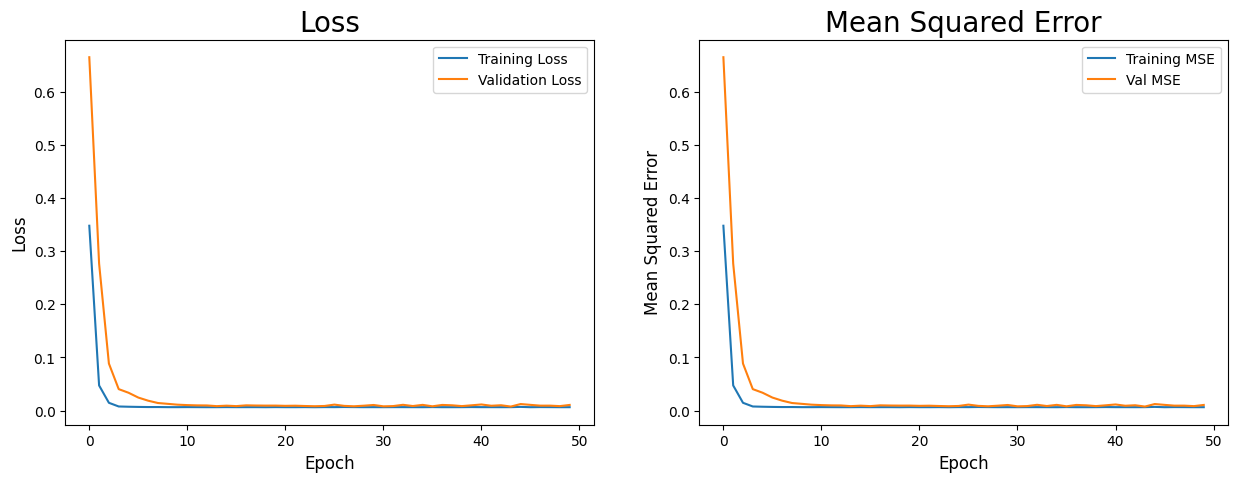

In [ ]:
lstmgwo_11=train_gwo(x_train,y_train,n=256,lr=0.00074)

In [ ]:
pred_train_lstmgwo_11, pred_test_lstmgwo_11=test_gwo(lstmgwo_11,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_11)
pred_train_lstmgwo.append(pred_train_lstmgwo_11)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (12)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.5281 - mse: 0.5281 - val_loss: 0.7210 - val_mse: 0.7210
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0671 - mse: 0.0671 - val_loss: 0.2883 - val_mse: 0.2883
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0857 - val_mse: 0.0857
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0082 - mse: 0.

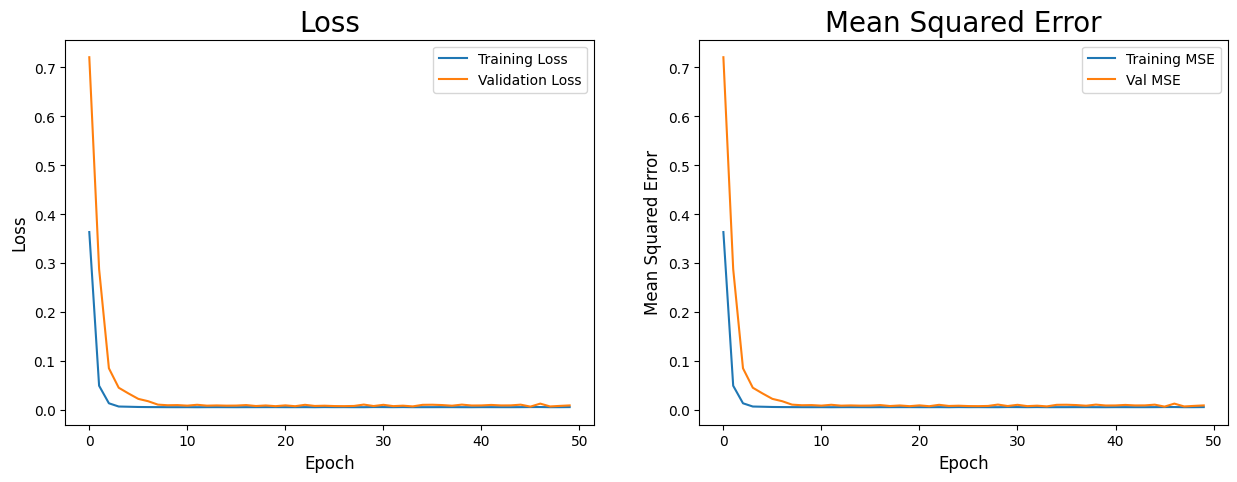

In [ ]:
lstmgwo_12=train_gwo(x_train,y_train,n=254,lr=0.00081)

In [ ]:
pred_train_lstmgwo_12, pred_test_lstmgwo_12=test_gwo(lstmgwo_12,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_12)
pred_train_lstmgwo.append(pred_train_lstmgwo_12)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (13)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4306 - mse: 0.4306 - val_loss: 0.5328 - val_mse: 0.5328
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0476 - mse: 0.0476 - val_loss: 0.1745 - val_mse: 0.1745
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0478 - val_mse: 0.0478
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0274 - val_mse: 0.0274
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0068 - mse: 0.

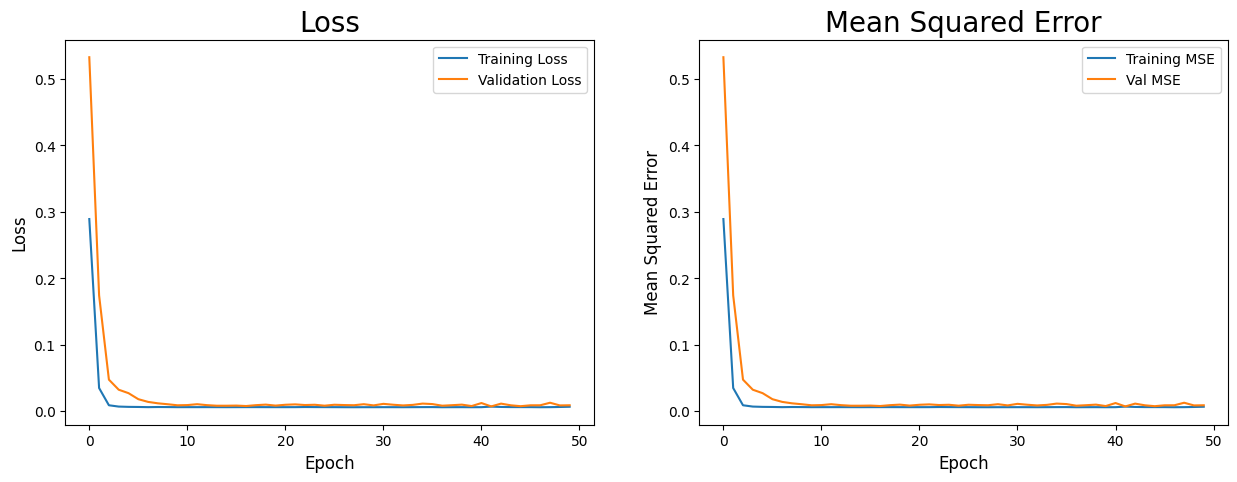

In [ ]:
lstmgwo_13=train_gwo(x_train,y_train,n=256,lr=0.00094)

In [ ]:
pred_train_lstmgwo_13, pred_test_lstmgwo_13=test_gwo(lstmgwo_13,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_13)
pred_train_lstmgwo.append(pred_train_lstmgwo_13)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (14)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4659 - mse: 0.4659 - val_loss: 0.6238 - val_mse: 0.6238
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0529 - mse: 0.0529 - val_loss: 0.2483 - val_mse: 0.2483
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0766 - val_mse: 0.0766
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0379 - val_mse: 0.0379
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0067 - mse: 0.

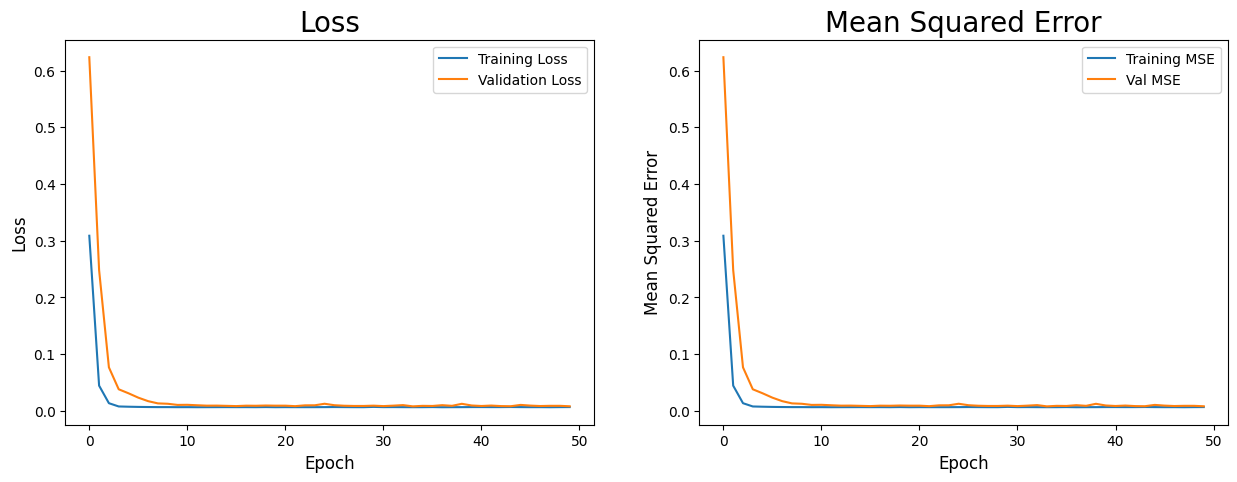

In [ ]:
lstmgwo_14=train_gwo(x_train,y_train,n=256,lr=0.00075)

In [ ]:
pred_train_lstmgwo_14, pred_test_lstmgwo_14=test_gwo(lstmgwo_14,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_14)
pred_train_lstmgwo.append(pred_train_lstmgwo_14)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (15)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.5890 - mse: 0.5890 - val_loss: 1.1708 - val_mse: 1.1708
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4908 - mse: 0.4908 - val_loss: 1.0809 - val_mse: 1.0809
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3893 - mse: 0.3893 - val_loss: 0.9961 - val_mse: 0.9961
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3261 - mse: 0.3261 - val_loss: 0.9122 - val_mse: 0.9122
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2345 - mse: 0.2345 - val_loss: 0.8355 - val_mse: 0.8355
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1675 - mse: 0.1675 - val_loss: 0.7592 - val_mse: 0.7592
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1087 - mse: 0.1087 - val_loss: 0.6883 - val_mse: 0.6883
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0798 - mse: 0.0798 - val_loss: 0.6221 - val_mse: 0.6221
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0547 - mse: 0.054

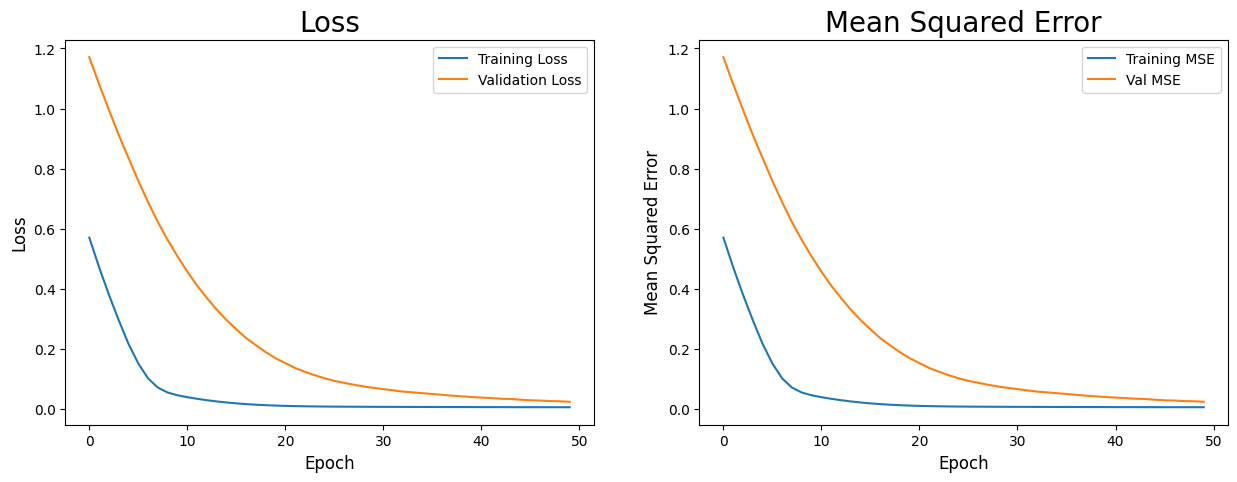

In [ ]:
lstmgwo_15=train_gwo(x_train,y_train,n=222,lr=0.0001)

In [ ]:
pred_train_lstmgwo_15, pred_test_lstmgwo_15=test_gwo(lstmgwo_15,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_15)
pred_train_lstmgwo.append(pred_train_lstmgwo_15)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


# Model LSTM-GWO Terbaik (16)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.4423 - mse: 0.4423 - val_loss: 0.5306 - val_mse: 0.5306
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0449 - mse: 0.0449 - val_loss: 0.2116 - val_mse: 0.2116
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.006

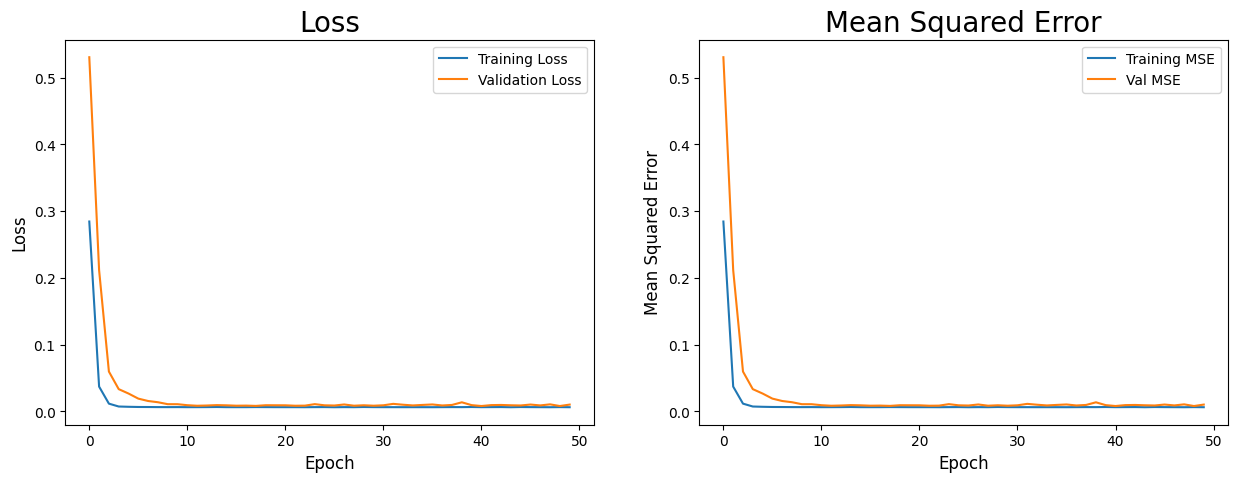

In [ ]:
lstmgwo_16=train_gwo(x_train,y_train,n=256,lr=0.00079)

In [ ]:
pred_train_lstmgwo_16, pred_test_lstmgwo_16=test_gwo(lstmgwo_16,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_16)
pred_train_lstmgwo.append(pred_train_lstmgwo_16)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (17)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.4031 - mse: 0.4031 - val_loss: 0.5426 - val_mse: 0.5426
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0464 - mse: 0.0464 - val_loss: 0.2307 - val_mse: 0.2307
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0779 - val_mse: 0.0779
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0058 - mse: 0.

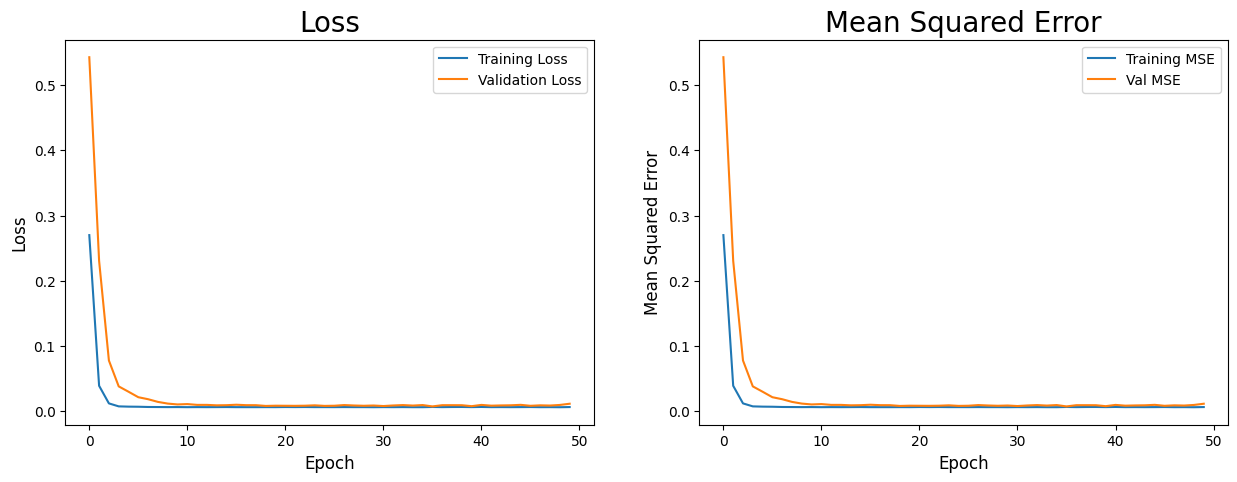

In [ ]:
lstmgwo_17=train_gwo(x_train,y_train,n=256,lr=0.00073)

In [ ]:
pred_train_lstmgwo_17, pred_test_lstmgwo_17=test_gwo(lstmgwo_17,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_17)
pred_train_lstmgwo.append(pred_train_lstmgwo_17)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


# Model LSTM-GWO Terbaik (18)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.6161 - mse: 0.6161 - val_loss: 1.2235 - val_mse: 1.2235
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5078 - mse: 0.5078 - val_loss: 1.1290 - val_mse: 1.1290
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4136 - mse: 0.4136 - val_loss: 1.0391 - val_mse: 1.0391
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3362 - mse: 0.3362 - val_loss: 0.9518 - val_mse: 0.9518
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2465 - mse: 0.2465 - val_loss: 0.8659 - val_mse: 0.8659
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1625 - mse: 0.1625 - val_loss: 0.7862 - val_mse: 0.7862
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1133 - mse: 0.1133 - val_loss: 0.7085 - val_mse: 0.7085
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0775 - mse: 0.0775 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0621 - mse: 0.

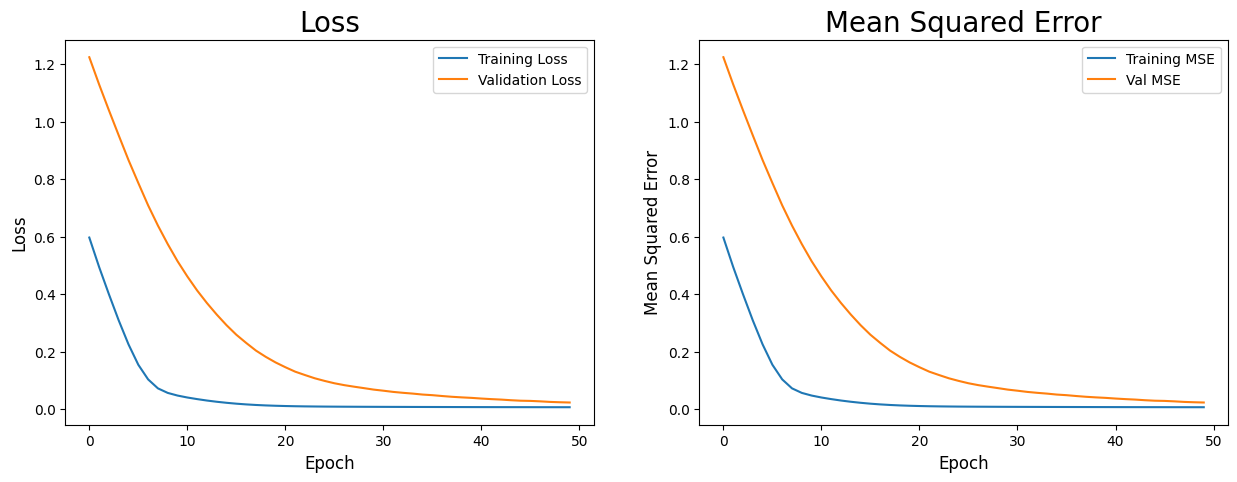

In [ ]:
lstmgwo_18=train_gwo(x_train,y_train,n=245,lr=0.0001)

In [ ]:
pred_train_lstmgwo_18, pred_test_lstmgwo_18=test_gwo(lstmgwo_18,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_18)
pred_train_lstmgwo.append(pred_train_lstmgwo_18)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (19)

sama kek 2

In [ ]:
pred_test_lstmgwo.append(pred_test_lstmgwo_2)
pred_train_lstmgwo.append(pred_train_lstmgwo_2)

# Model LSTM-GWO Terbaik (20)

sama kek 2

In [ ]:
pred_test_lstmgwo.append(pred_test_lstmgwo_2)
pred_train_lstmgwo.append(pred_train_lstmgwo_2)

# Model LSTM-GWO Terbaik (21)

sama kek dua

In [ ]:
pred_test_lstmgwo.append(pred_test_lstmgwo_2)
pred_train_lstmgwo.append(pred_train_lstmgwo_2)

# Model LSTM-GWO Terbaik (22)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.4073 - mse: 0.4073 - val_loss: 0.5086 - val_mse: 0.5086
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0434 - mse: 0.0434 - val_loss: 0.1896 - val_mse: 0.1896
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0528 - val_mse: 0.0528
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0065 - mse: 0.

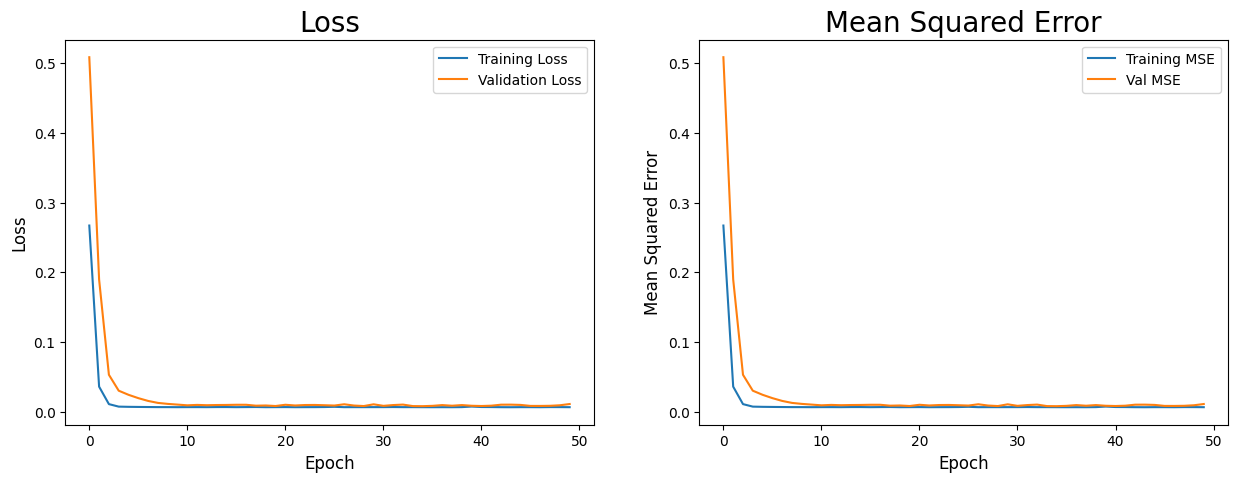

In [ ]:
lstmgwo_22=train_gwo(x_train,y_train,n=253,lr=0.00077)

In [ ]:
pred_train_lstmgwo_22, pred_test_lstmgwo_22=test_gwo(lstmgwo_22,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_22)
pred_train_lstmgwo.append(pred_train_lstmgwo_22)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (23)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4208 - mse: 0.4208 - val_loss: 0.5523 - val_mse: 0.5523
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.2083 - val_mse: 0.2083
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0558 - val_mse: 0.0558
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0060 - mse: 0.

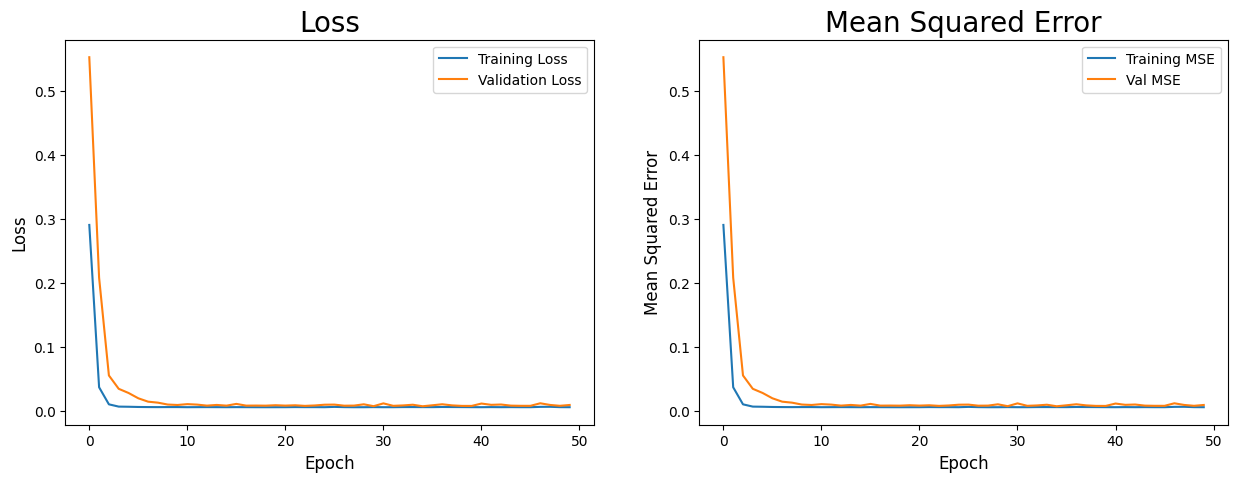

In [ ]:
lstmgwo_23=train_gwo(x_train,y_train,n=256,lr=0.00079)

In [ ]:
pred_train_lstmgwo_23, pred_test_lstmgwo_23=test_gwo(lstmgwo_23,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_23)
pred_train_lstmgwo.append(pred_train_lstmgwo_23)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Model LSTM-GWO Terbaik (24)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.4999 - mse: 0.4999 - val_loss: 0.6665 - val_mse: 0.6665
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0562 - mse: 0.0562 - val_loss: 0.2705 - val_mse: 0.2705
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0785 - val_mse: 0.0785
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0402 - val_mse: 0.0402
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0074 - mse: 0.

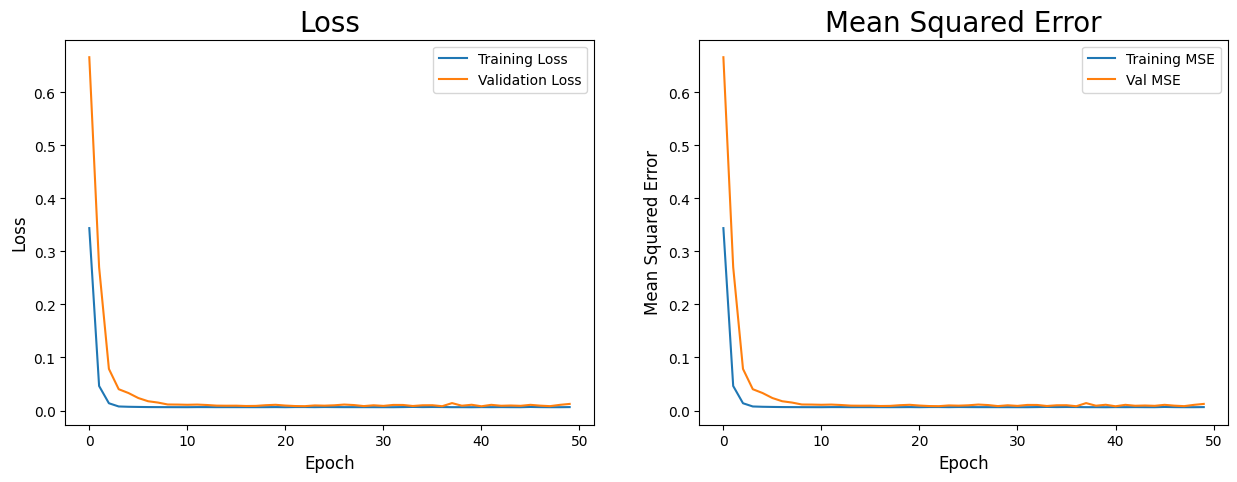

In [ ]:
lstmgwo_24=train_gwo(x_train,y_train,n=256,lr=0.0008)

In [ ]:
pred_train_lstmgwo_24, pred_test_lstmgwo_24=test_gwo(lstmgwo_24,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_24)
pred_train_lstmgwo.append(pred_train_lstmgwo_24)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


# Model LSTM-GWO Terbaik (25)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5543 - mse: 0.5543 - val_loss: 0.9049 - val_mse: 0.9049
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1855 - mse: 0.1855 - val_loss: 0.6072 - val_mse: 0.6072
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0528 - mse: 0.0528 - val_loss: 0.3931 - val_mse: 0.3931
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0315 - mse: 0.0315 - val_loss: 0.2469 - val_mse: 0.2469
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.1521 - val_mse: 0.1521
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0949 - val_mse: 0.0949
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0681 - val_mse: 0.0681
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0526 - val_mse: 0.0526
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0079 - mse: 0.0079

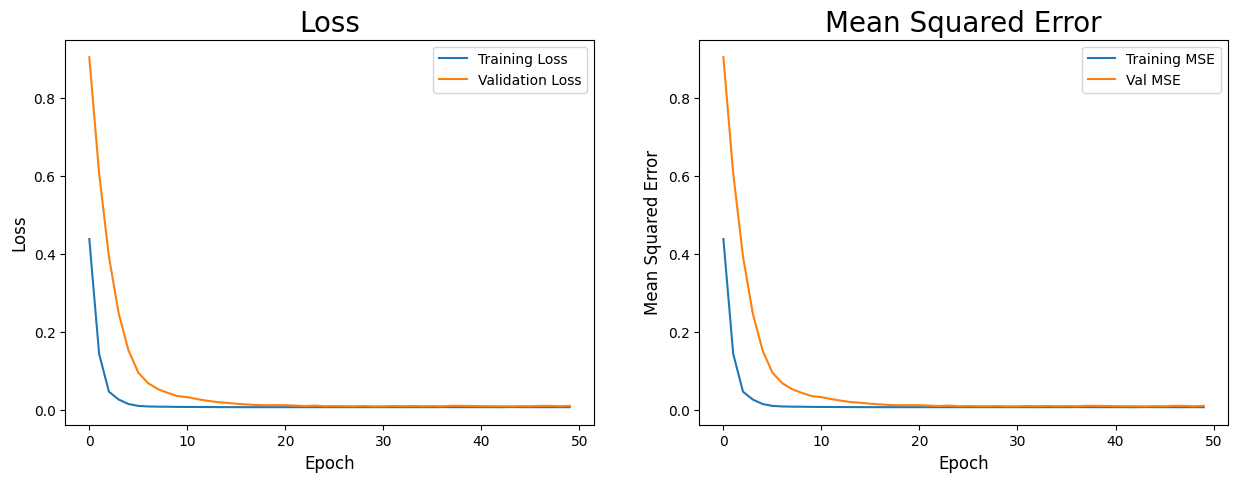

In [ ]:
lstmgwo_25=train_gwo(x_train,y_train,n=235,lr=0.00039)

In [ ]:
pred_train_lstmgwo_25, pred_test_lstmgwo_25=test_gwo(lstmgwo_25,x_train,x_valid)
pred_test_lstmgwo.append(pred_test_lstmgwo_25)
pred_train_lstmgwo.append(pred_train_lstmgwo_25)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


# Inverse Transformation

In [ ]:
## Inverse Transform Training
train_original=scaler.inverse_transform(np.array(y_train).reshape(-1,1))
train_biasa_original = scaler.inverse_transform(np.array(pred_train_biasa))
train_lstmgwo_original = [scaler.inverse_transform(np.array(pred).reshape(-1, 1)) for pred in pred_train_lstmgwo]

## Inverse Transform Testing
test_original=scaler.inverse_transform(np.array(y_valid).reshape(-1,1))
test_biasa_original = scaler.inverse_transform(np.array(pred_test_biasa))
test_lstmgwo_original = [scaler.inverse_transform(np.array(pred).reshape(-1, 1)) for pred in pred_test_lstmgwo]

# MSE Comparison

In [ ]:
train_mse_compare=[]
train_mae_compare=[]
train_mape_compare=[]
for i in range (25):
  mse_comparison=calculate_mse(train_original,train_lstmgwo_original[i])
  train_mse_compare.append(mse_comparison)
  mae_comparison=calculate_mae(train_original,train_lstmgwo_original[i])
  train_mae_compare.append(mae_comparison)
  mape_comparison=calculate_mape(train_original,train_lstmgwo_original[i])
  train_mape_compare.append(mape_comparison)

mse_terkecil=np.min(train_mse_compare)
indeks_mse_terkecil=train_mse_compare.index(mse_terkecil)

print (mse_terkecil)
print(indeks_mse_terkecil)

25.447617050851456
13


In [ ]:
test_mse_compare=[]
test_mae_compare=[]
test_mape_compare=[]
for i in range (25):
  mse_comparison=calculate_mse(test_original,test_lstmgwo_original[i])
  test_mse_compare.append(mse_comparison)
  mae_comparison=calculate_mae(test_original,test_lstmgwo_original[i])
  test_mae_compare.append(mae_comparison)
  mape_comparison=calculate_mape(test_original,test_lstmgwo_original[i])
  test_mape_compare.append(mape_comparison)

mse_terkecil=np.min(test_mse_compare)
indeks_mse_terkecil=test_mse_compare.index(mse_terkecil)

print (mse_terkecil)
print(indeks_mse_terkecil)

410.6231351811835
13


In [ ]:
train_mse_compare = [arr.item() for arr in train_mse_compare]
train_mae_compare = [arr.item() for arr in train_mae_compare]
train_mape_compare = [arr.item() for arr in train_mape_compare]

test_mse_compare = [arr.item() for arr in test_mse_compare]
test_mae_compare = [arr.item() for arr in test_mae_compare]
test_mape_compare = [arr.item() for arr in test_mape_compare]

# Dataframe Baru

In [ ]:
df_hasil=pd.DataFrame({
    'MSE_Train':train_mse_compare,
    'MSE_Test':test_mse_compare,
    'MAE_Train': train_mae_compare,
    'MAE_Test': test_mae_compare,
    'MAPE_Train': train_mape_compare,
    'MAPE_Test': test_mape_compare})
print(df_hasil)

     MSE_Train     MSE_Test  MAE_Train  MAE_Test  MAPE_Train  MAPE_Test
0    31.787309   513.575587   0.000019  0.000170    0.001878   0.017039
1    41.552998   620.987639   0.000021  0.000187    0.002147   0.018737
2    40.975937   582.833176   0.000021  0.000182    0.002132   0.018152
3    35.583097   544.770615   0.000020  0.000175    0.001987   0.017549
4    34.151206   548.027065   0.000019  0.000176    0.001946   0.017602
5    48.743553   677.575333   0.000023  0.000196    0.002325   0.019572
6    37.321385   559.709980   0.000020  0.000178    0.002035   0.017788
7    34.606691   518.001186   0.000020  0.000171    0.001959   0.017113
8    34.718388   483.306504   0.000020  0.000165    0.001963   0.016530
9    31.390390   444.894373   0.000019  0.000159    0.001866   0.015859
10   43.652516   607.550934   0.000022  0.000185    0.002201   0.018533
11   42.653923   637.258211   0.000022  0.000190    0.002175   0.018980
12   36.101202   566.094051   0.000020  0.000179    0.002001   0

In [ ]:
df_hasil.to_excel('df_new.xlsx', index=False)

In [ ]:
from google.colab import files
files.download('df_new.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Evaluation



> Evaluasi Model LSTM Biasa



In [ ]:
mse_train_biasa=calculate_mse(train_original,train_biasa_original)
mape_train_biasa=calculate_mape(train_original,train_biasa_original)
mae_train_biasa=calculate_mae(train_original,train_biasa_original)

In [ ]:
mse_test_biasa=calculate_mse(test_original,test_biasa_original)
mape_test_biasa=calculate_mape(test_original,test_biasa_original)
mae_test_biasa=calculate_mae(test_original,test_biasa_original)

# Prediction Comparison



> After Inverse



In [ ]:
train_lstmgwo_original_12 = scaler.inverse_transform(np.array(pred_train_lstmgwo_12))
test_lstmgwo_original_12 = scaler.inverse_transform(np.array(pred_test_lstmgwo_12))

**Training**

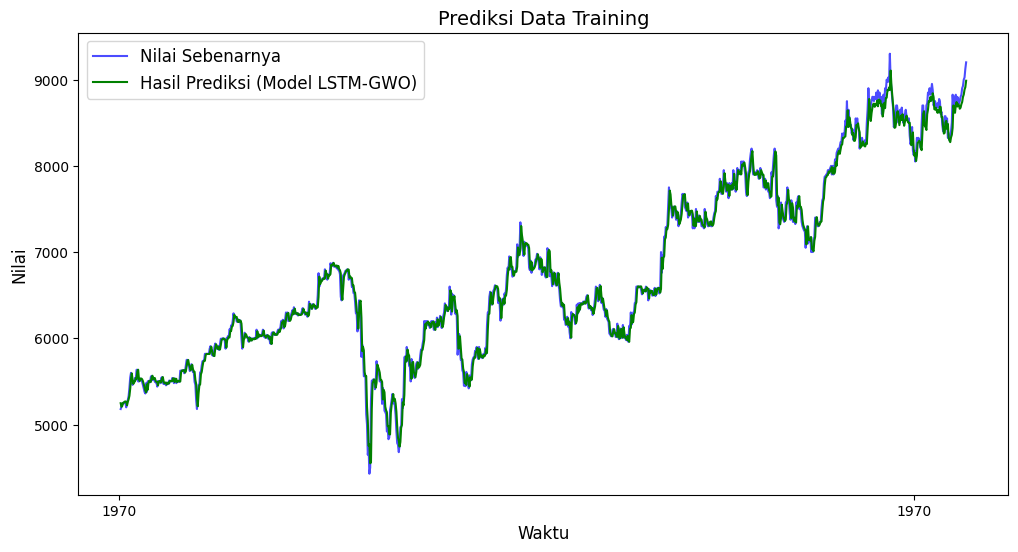

In [ ]:
plt.figure(figsize=(12, 6))

# Plot nilai sebenarnya
plt.plot(y_train.index,train_original, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

# Plot hasil prediksi dari model LSTM-GWO
plt.plot(y_train.index,train_lstmgwo_original_12, label=f'Hasil Prediksi (Model LSTM-GWO)', color='green')
# Menambahkan judul dan label
plt.title(f'Prediksi Data Training', fontsize=14)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend(fontsize=12)

# Menampilkan plot
plt.show()

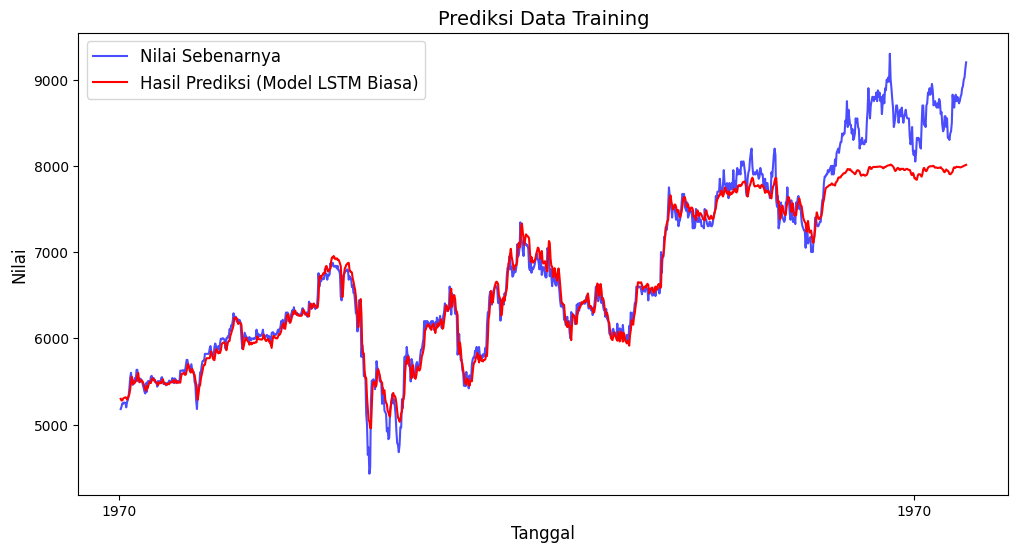

In [ ]:
plt.figure(figsize=(12, 6))

# Plot nilai sebenarnya
plt.plot(y_train.index,train_original, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

# Plot hasil prediksi dari model LSTM Biasa
plt.plot(y_train.index,train_biasa_original, label=f'Hasil Prediksi (Model LSTM Biasa)', color='red')
# Menambahkan judul dan label
plt.title(f'Prediksi Data Training', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend(fontsize=12)

# Menampilkan plot
plt.show()

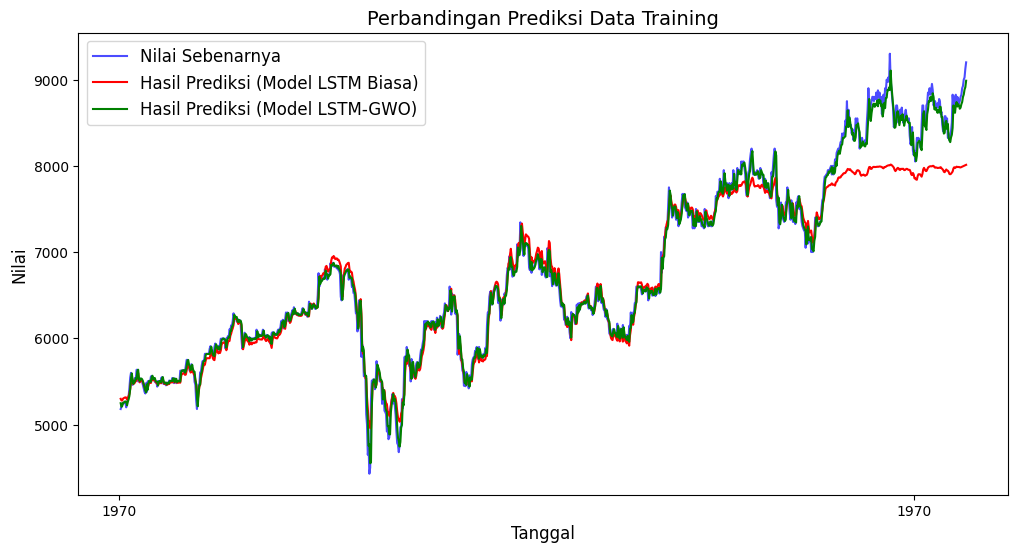

In [ ]:
plt.figure(figsize=(12, 6))

# Plot nilai sebenarnya
plt.plot(y_train.index,train_original, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

# Plot hasil prediksi dari model LSTM Biasa
plt.plot(y_train.index,train_biasa_original, label=f'Hasil Prediksi (Model LSTM Biasa)', color='red')

# Plot hasil prediksi dari model LSTM-GWO
plt.plot(y_train.index,train_lstmgwo_original_12, label=f'Hasil Prediksi (Model LSTM-GWO)', color='green')

# Menambahkan judul dan label
plt.title(f'Perbandingan Prediksi Data Training', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend(fontsize=12)

# Menampilkan plot
plt.show()

**Testing**

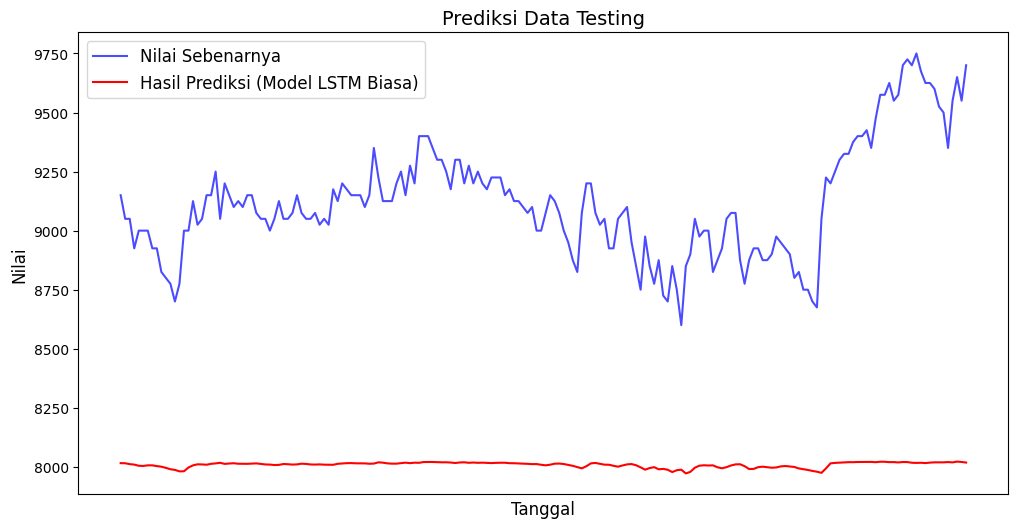

In [ ]:
plt.figure(figsize=(12, 6))

# Plot nilai sebenarnya
plt.plot(y_valid.index,test_original, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

# Plot hasil prediksi dari model LSTM Biasa
plt.plot(y_valid.index,test_biasa_original, label=f'Hasil Prediksi (Model LSTM Biasa)', color='red')

# Menambahkan judul dan label
plt.title(f'Prediksi Data Testing', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend(fontsize=12)

# Menampilkan plot
plt.show()

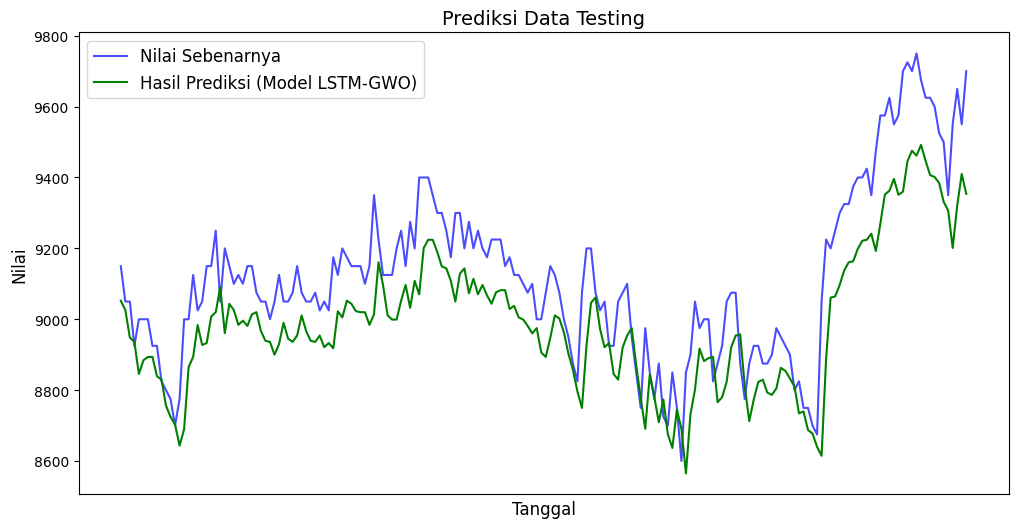

In [ ]:
plt.figure(figsize=(12, 6))

# Plot nilai sebenarnya
plt.plot(y_valid.index,test_original, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

# Plot hasil prediksi dari model LSTM GWO
plt.plot(y_valid.index,test_lstmgwo_original_12, label=f'Hasil Prediksi (Model LSTM-GWO)', color='green')

# Menambahkan judul dan label
plt.title(f'Prediksi Data Testing', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend(fontsize=12)

# Menampilkan plot
plt.show()

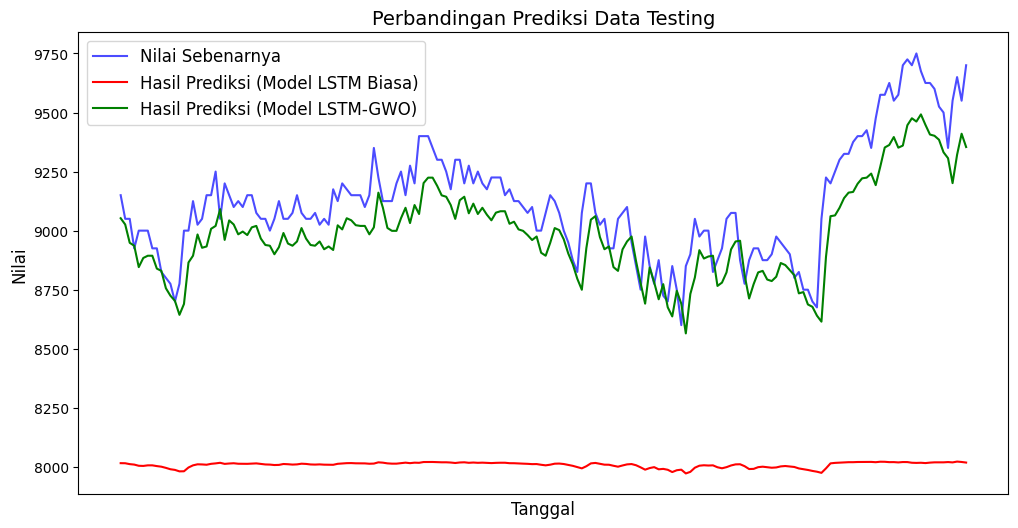

In [ ]:
plt.figure(figsize=(12, 6))

# Plot nilai sebenarnya
plt.plot(y_valid.index,test_original, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

# Plot hasil prediksi dari model LSTM Biasa
plt.plot(y_valid.index,test_biasa_original, label=f'Hasil Prediksi (Model LSTM Biasa)', color='red')

# Plot hasil prediksi dari model LSTM-GWO
plt.plot(y_valid.index,test_lstmgwo_original_12, label=f'Hasil Prediksi (Model LSTM-GWO)', color='green')

# Menambahkan judul dan label
plt.title(f'Perbandingan Prediksi Data Testing', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend(fontsize=12)

# Menampilkan plot
plt.show()

# Forecasting 50 Days Ahead

In [ ]:
# Perulangan untuk memprediksi masa depan
steps = 50

for i in range(steps):
    # Mendapatkan indeks baru untuk baris yang akan ditambahkan
  new_dex = df_close.index[-1] + pd.DateOffset(days=1)

    # Membuat DataFrame baru dengan nilai NaN di kolom pertama dan nilai dari baris terakhir di kolom lainnya
  new_row = pd.DataFrame(
      [[np.nan,df_close['Close'].iloc[-1], df_close['lag_1'].iloc[-1]]],
      columns=df_close.columns,
      index=[new_dex]
    )

    # Menambahkan baris baru ke DataFrame
  df_close = pd.concat([df_close,new_row])

    # Melakukan prediksi dengan model untuk mengisi nilai NaN
  forecast = lstmgwo_12.predict(df_close.iloc[[-1]].drop(columns=['Close']))
  df_close = df_close.fillna(forecast[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

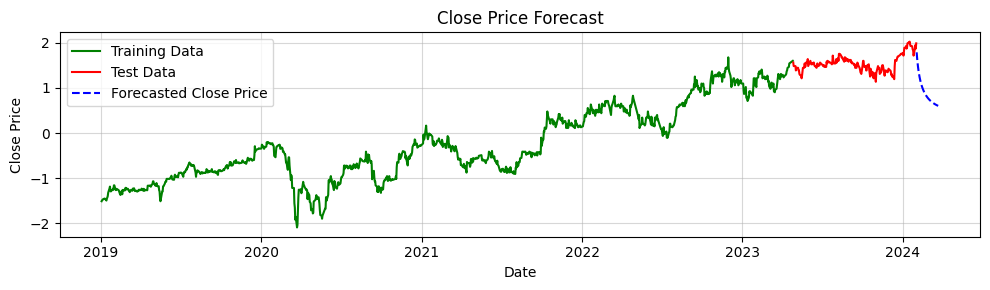

In [ ]:
##Memilih 365 baris terakhir dari kolom 'close'
historical = df_close[['Close']].iloc[-730-steps:-steps]
forecast = df_close[['Close']].iloc[-steps:]

# Membuat plot untuk visualisasi data 'close'
plt.figure(figsize=(10, 3))

# Plot garis untuk data historis
plt.plot(data_train.index    , data_train['Close']   , label='Training Data', color='green')
plt.plot(data_valid.index     , data_valid['Close']    , label='Test Data'    , color='red')

# Plot garis untuk forecast dengan garis putus-putus
plt.plot(forecast.index, forecast['Close'], label='Forecasted Close Price', color='blue', linestyle="--")

# Menambahkan judul dan label sumbu
plt.title('Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True, alpha=0.5, zorder=10)
plt.tight_layout()

# Menampilkan plot
plt.show()